In [13]:
from google.colab import files
import pandas as pd
uploaded = files.upload()
df = pd.read_csv('amazon.csv')
df.head()

Saving amazon.csv to amazon (2).csv


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [14]:
print("Missing Values:\n", df.isnull().sum())

df.dropna(inplace=True)

df.drop_duplicates(inplace=True)

Missing Values:
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [15]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

df = df[df['review_content'].notnull()]

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] > 0.05:
        return 'Positive'
    elif score['compound'] < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['review_content'].apply(get_sentiment)

df[['review_content', 'Sentiment']].head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,review_content,Sentiment
0,Looks durable Charging is fine tooNo complains...,Positive
1,I ordered this cable to connect my phone to An...,Positive
2,"Not quite durable and sturdy,https://m.media-a...",Positive
3,"Good product,long wire,Charges good,Nice,I bou...",Positive
4,"Bought this instead of original apple, does th...",Positive


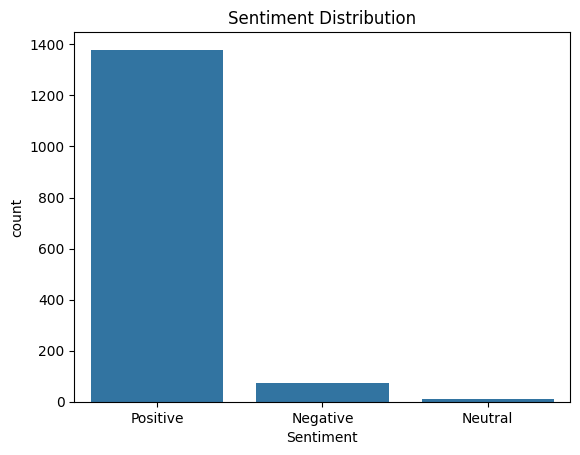

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Sentiment')
plt.title('Sentiment Distribution')
plt.show()

In [17]:
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '').astype(float)
print(df['discount_percentage'].dtypes)
print(df[['discount_percentage']].head())

float64
   discount_percentage
0                 64.0
1                 43.0
2                 90.0
3                 53.0
4                 61.0


In [18]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].str.replace(',', '').astype(float)
print(df[['discount_percentage', 'rating', 'rating_count']].dtypes)
print(df[['discount_percentage', 'rating', 'rating_count']].head())

discount_percentage    float64
rating                 float64
rating_count           float64
dtype: object
   discount_percentage  rating  rating_count
0                 64.0     4.2       24269.0
1                 43.0     4.0       43994.0
2                 90.0     3.9        7928.0
3                 53.0     4.2       94363.0
4                 61.0     4.2       16905.0


In [19]:
sentiment_group = df.groupby('Sentiment')[['discount_percentage', 'rating']].mean()
print(sentiment_group)

           discount_percentage    rating
Sentiment                               
Negative             44.608108  3.886486
Neutral              44.900000  3.870000
Positive             47.833938  4.109652


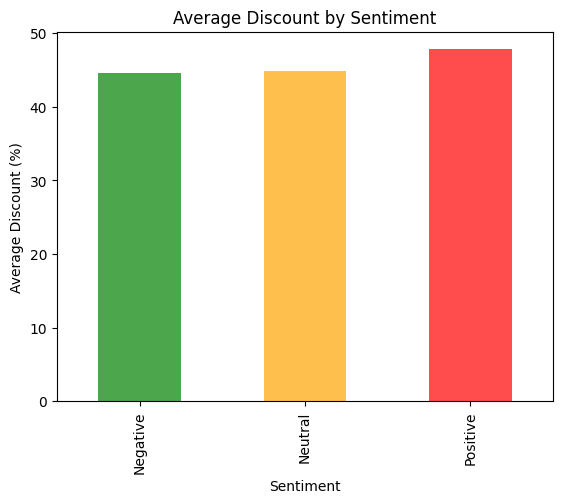

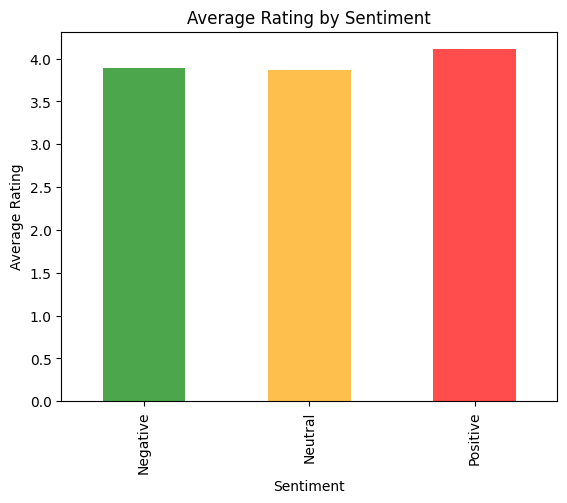

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sentiment_group['discount_percentage'].plot(kind='bar', color=['green', 'orange', 'red'], alpha=0.7)
plt.title('Average Discount by Sentiment')
plt.ylabel('Average Discount (%)')
plt.xlabel('Sentiment')
plt.show()

sentiment_group['rating'].plot(kind='bar', color=['green', 'orange', 'red'], alpha=0.7)
plt.title('Average Rating by Sentiment')
plt.ylabel('Average Rating')
plt.xlabel('Sentiment')
plt.show()


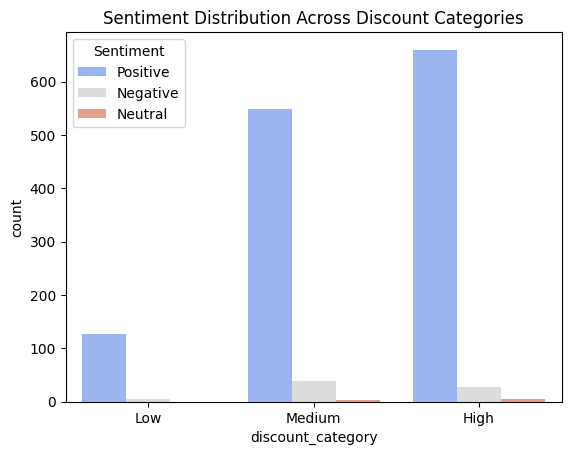

In [21]:
df['discount_category'] = pd.cut(df['discount_percentage'], bins=[0, 20, 50, 100], labels=['Low', 'Medium', 'High'])
sns.countplot(data=df, x='discount_category', hue='Sentiment', palette='coolwarm')
plt.title('Sentiment Distribution Across Discount Categories')
plt.show()

/tmp/ipython-input-22-1540912685.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sentiment', y='rating', palette='coolwarm')


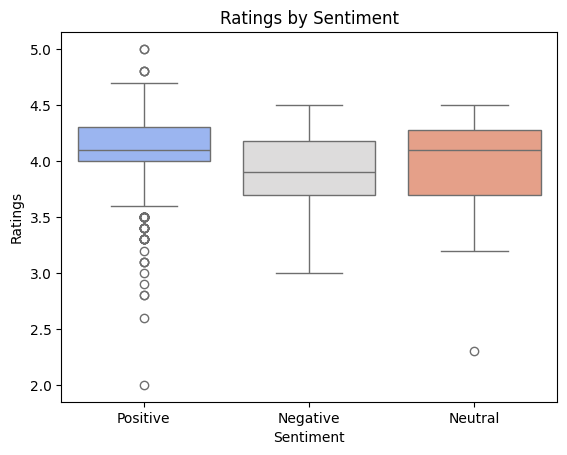

In [22]:
sns.boxplot(data=df, x='Sentiment', y='rating', palette='coolwarm')
plt.title('Ratings by Sentiment')
plt.ylabel('Ratings')
plt.xlabel('Sentiment')
plt.show()

In [23]:
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '').astype(float)
print(df['actual_price'].head())
print(df['actual_price'].dtypes)

0    1099.0
1     349.0
2    1899.0
3     699.0
4     399.0
Name: actual_price, dtype: float64
float64


In [24]:
print(df['rating'].isnull().sum())
df = df.dropna(subset=['rating'])
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df.dropna(subset=['rating'])
print(df['rating'].head())
print(df['rating'].isnull().sum())

1
0    4.2
1    4.0
2    3.9
3    4.2
4    4.2
Name: rating, dtype: float64
0


/tmp/ipython-input-24-1275445277.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df[['discount_percentage', 'actual_price']]
y = df['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

predictions = reg_model.predict(X_test)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, predictions))


Mean Squared Error (MSE): 0.07922337683786035


In [26]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 0.07922337683786035
R-squared (R²): 0.0315062046061273


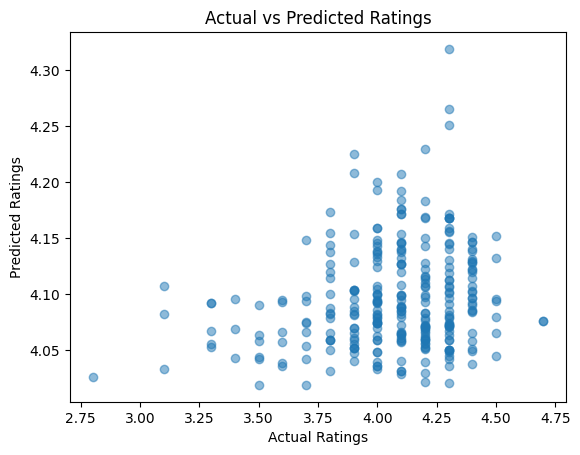

In [27]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions, alpha=0.5)
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

In [28]:
df.to_excel('Cleaned_Amazon_Data.xlsx', index=False)

from google.colab import files
files.download('Cleaned_Amazon_Data.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>